# Import Libraries and Load Dataset

In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Load the Titanic Dataset
df = pd.read_csv('Titanic-Dataset.csv') 

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

In [51]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [53]:
# Fill missing Age values with mean
df['Age']=df['Age'].fillna(df['Age'].mean())

In [55]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [57]:
# Drop irrelevant columns
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [59]:
# Drop rows with missing Embarked
df = df.dropna(subset=['Embarked'])

In [61]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [63]:
# Create New Features/Column
# Calculate Family Size
df['Family_Size'] = df['SibSp'] + df['Parch']

In [65]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Family_Size      0
dtype: int64


In [67]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Analysis Questions

In [70]:
# 1.Survival Rate by Age Group
# Create Age Group
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Middle Age', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_group_survival = df.groupby('Age_Group')['Survived'].mean()
print("Survival Rate by Age Group:\n", age_group_survival)

Survival Rate by Age Group:
 Age_Group
Child         0.579710
Teen          0.428571
Adult         0.353271
Middle Age    0.396907
Senior        0.190476
Name: Survived, dtype: float64


C:\Users\Akshay Besekar\AppData\Local\Temp\ipykernel_1196\1845902966.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df.groupby('Age_Group')['Survived'].mean()


In [72]:
# 2. Survival Rate by Embarkation Port
embark_survival = df.groupby('Embarked')['Survived'].mean()
print("\nSurvival Rate by Embarkation Port:\n", embark_survival)


Survival Rate by Embarkation Port:
 Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [74]:
# 3. Survival Rate by Family Size
family_survival = df.groupby('Family_Size')['Survived'].mean()
print("\nSurvival Rate by Family Size:\n", family_survival)


Survival Rate by Family Size:
 Family_Size
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


#  Data Visualizations

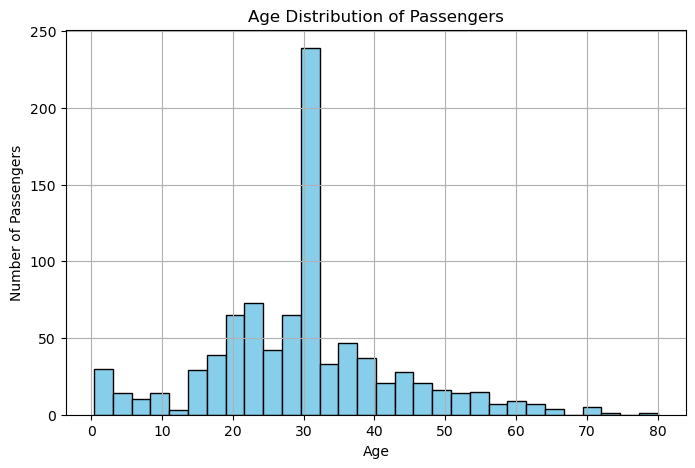

In [77]:
# 1. Age Distribution Histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

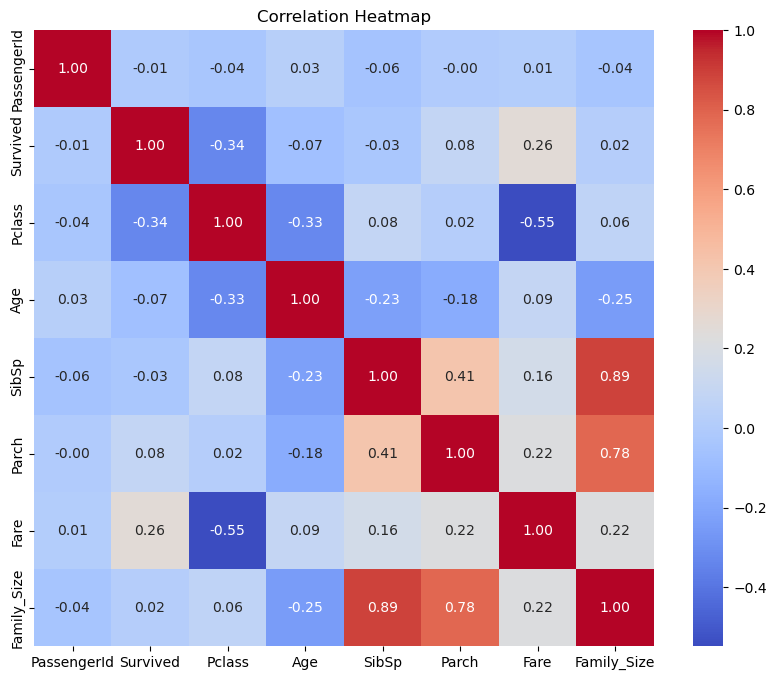

In [85]:
# 2. Heatmap of Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

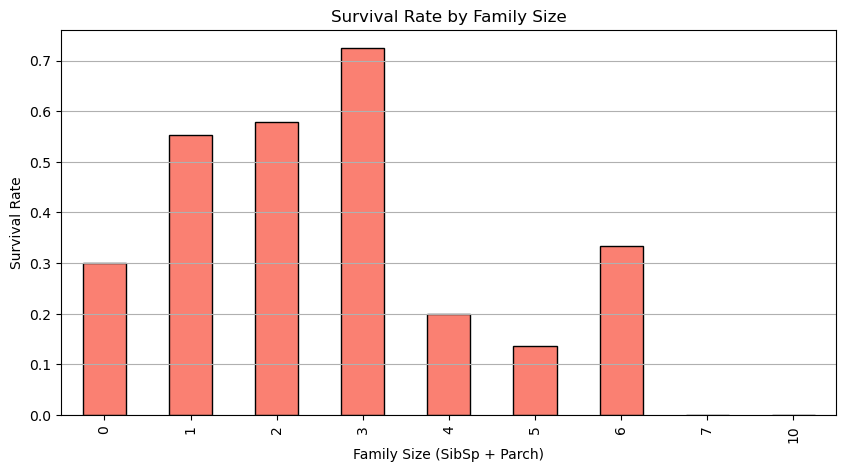

In [81]:
# 3. Survival Rate by Family Size Bar Plot
plt.figure(figsize=(10, 5))
family_survival.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size (SibSp + Parch)')
plt.ylabel('Survival Rate')
plt.grid(axis='y')
plt.show()